In [2]:
#Machine Learning with train data
#Logistic Regression 
#Cross Validation
#Decision Tree
#Random Forest
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#logistic regression
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import os

In [5]:
train = pd.read_csv('train.csv', sep=',', index_col=0)

In [92]:
#dropping columns
#df.drop(columns=['B', 'C'])

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#get basic descriptive statistics
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Investigating and understanding main trends of the data
tr_grouped=train.groupby(['Sex', 'Pclass'])['Survived'].value_counts()
tr_grouped


Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [96]:
#train['tr_grouped']= train.groupby(['Sex', 'Pclass','Survived']).transform('count')
#sns.scatterplot(x='Pclass', y='tr_grouped', hue='Survived',style='Sex', data=train)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
# step 2 
#Calculate the proportion of surviving 1st class passengers
#with regards to the total number of 1st class passengers.
subtrain=train.loc[(train['Pclass'] ==1)] 
subtrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [11]:
#Step 3

#Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

table = pd.crosstab(train['Survived'],train['Pclass'])
print (table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [12]:
#Step3
class_sur= train.groupby('Pclass').Survived.mean()
print(class_sur)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [13]:
#Transform sex column into a dummy
train['Sex_c']=np.where(train['Sex']=='male' , 0 , 1)


In [14]:
#or 
train['Sex_factorized'] = pd.factorize(train['Sex'])[0]

In [15]:
train[['Sex_c', 'Sex_factorized']].head()

,Sex_c,Sex_factorized
PassengerId,,
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0


In [16]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
#Step3
sex_sur= train.groupby('Sex').Survived.mean()
print(sex_sur)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [20]:
#Step3
age_sex= train.groupby('Sex').Age.mean()
print(age_sex)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [21]:
#Step3
sex_cl = pd.crosstab(train['Sex'],train['Pclass'])
print (sex_cl)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


In [22]:
train.groupby(["Pclass", "Sex"])["Age"].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [23]:
#Step3
sex_c= train.groupby('Pclass').Sex_c.mean()
print(sex_c)

Pclass
1    0.435185
2    0.413043
3    0.293279
Name: Sex_c, dtype: float64


In [111]:
#http://ghunt03.github.io/DAProjects/DAP02/TitanicDatasetInvestigation.html

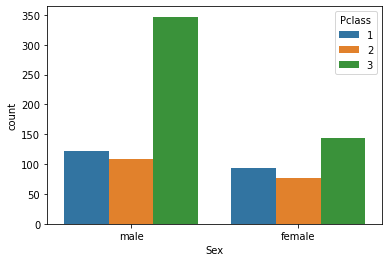

In [24]:
#Step 4

#Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
Step4 : sns.countplot(x='Sex', hue='Pclass', data=train)

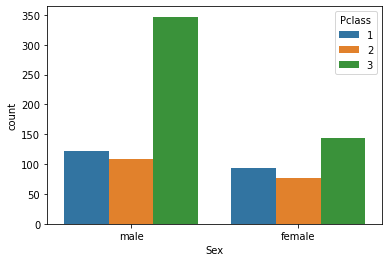

In [25]:
Step4 : sns.countplot(x='Sex', hue='Pclass', data=train)

<AxesSubplot:xlabel='Sex,Pclass'>

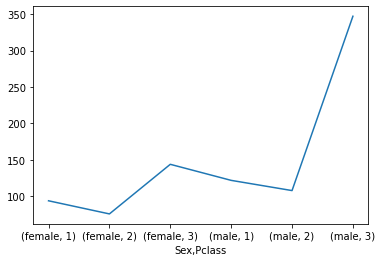

In [26]:
train.groupby(["Sex", "Pclass"])["Survived"].count().plot()

In [28]:
table1 = pd.crosstab(train['Sex'],train['Pclass'])
print (table1)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


In [29]:
#Step3
s_class= train.groupby('Pclass').Sex_c.mean()
print(s_class)

Pclass
1    0.435185
2    0.413043
3    0.293279
Name: Sex_c, dtype: float64


<AxesSubplot:ylabel='Frequency'>

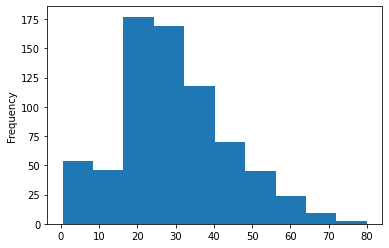

In [30]:
#Step 5

#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
train['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

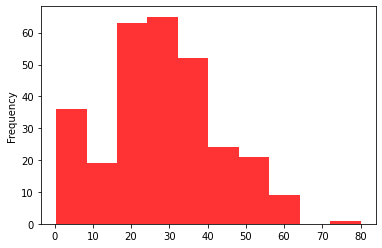

In [31]:
#Step 5
train['Age'].loc[train['Survived'] ==1].plot(alpha = 0.8, kind='hist', color='red')  

<AxesSubplot:ylabel='Frequency'>

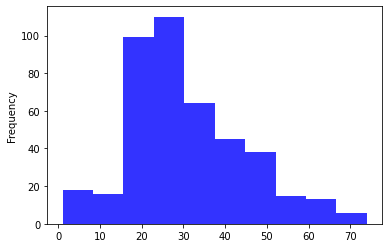

In [32]:
train['Age'].loc[train['Survived'] ==0].plot(alpha = 0.8, kind='hist', color='blue')

<AxesSubplot:ylabel='Frequency'>

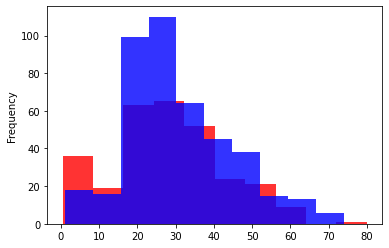

In [33]:
#together
train['Age'].loc[train['Survived'] ==1].plot(alpha = 0.8, kind='hist', color='red')  
train['Age'].loc[train['Survived'] ==0].plot(alpha = 0.8, kind='hist', color='blue')

In [34]:
#Step 6
#Calculate the average age for survived and drowned passengers separately.
#Step3
b= train.groupby('Survived').Age.mean()
print(b)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


In [35]:
c= train.groupby('Pclass').Age.mean()
print(c)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [36]:
mean = train.mean()
print(mean)


Survived           0.383838
Pclass             2.308642
Age               29.699118
SibSp              0.523008
Parch              0.381594
Fare              32.204208
Sex_c              0.352413
Sex_factorized     0.352413
dtype: float64


/tmp/ipykernel_16314/2787159315.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = train.mean()


In [37]:
train['Age'].mean()

29.69911764705882

In [38]:
#Step 7
#Replace missing age values by the mean age.
train.isnull().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Sex_c               0
Sex_factorized      0
dtype: int64

In [39]:
#Step 7
#Replace missing age values by the mean age.
#train.fillna(train['Age'].mean())
#Lets replace missing age values instead mean age by sex
train['age_sex']= train['Age'].fillna(train.groupby('Sex')['Age'].transform('mean'))
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_c,Sex_factorized,age_sex
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,35.0


In [41]:
#create binns for age
pd.cut(train['age_sex'], bins=3, labels=['Young', 'MiddleAge', 'Old'])

PassengerId
1          Young
2      MiddleAge
3          Young
4      MiddleAge
5      MiddleAge
         ...    
887    MiddleAge
888        Young
889    MiddleAge
890        Young
891    MiddleAge
Name: age_sex, Length: 891, dtype: category
Categories (3, object): ['Young' < 'MiddleAge' < 'Old']

In [42]:
#or
pd.cut(train['age_sex'], bins=[0, 25, 45, 75], labels=['Young', 'MiddleAge', 'Old'])

PassengerId
1          Young
2      MiddleAge
3      MiddleAge
4      MiddleAge
5      MiddleAge
         ...    
887    MiddleAge
888        Young
889    MiddleAge
890    MiddleAge
891    MiddleAge
Name: age_sex, Length: 891, dtype: category
Categories (3, object): ['Young' < 'MiddleAge' < 'Old']

In [43]:
age_sex= train.groupby('Sex').Age.mean()
print(age_sex)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [44]:
g2 = train.groupby(["Sex", "Pclass"])


In [45]:
#Step 8
#Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
table2 = pd.crosstab(train['Survived'], train['Sex'])
print (table2)

Sex       female  male
Survived              
0             81   468
1            233   109


<AxesSubplot:xlabel='Sex', ylabel='count'>

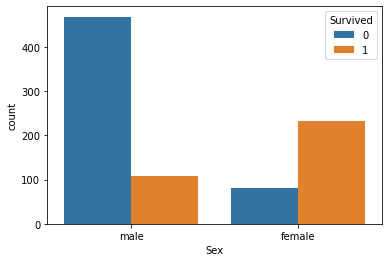

In [46]:
sns.countplot(x='Sex', hue='Survived', data=train)

In [47]:
table3 = pd.crosstab(train['Survived'], train['Pclass'])
print (table3)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


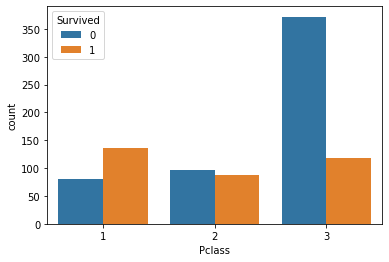

In [48]:
Step4 : sns.countplot(x='Pclass', hue='Survived', data=train)

In [50]:
import seaborn as sns

In [52]:
#2.2. Scikit-learn
#Step 1 - Define Business Goal
#the probability of surviving of a female passenger from third class



In [53]:
#2.2 Machine Learning
#Logistic Regression
from sklearn.model_selection import train_test_split
#Define X (Pclass, Sex group and age) and Y (Survived)
X=train[['Sex_c', 'Pclass', 'age_sex']]
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X.shape, y.shape

((891, 3), (891,))

In [55]:
#Normalising the train and test
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

In [56]:
#Instatiate the model
m=LogisticRegression()
#Balancing classes
#the option class_weight='balanced' is to even out the bias caused by the non-survivors outnumbering the survivors.
m=LogisticRegression(class_weight="balanced") #when balanced the scores are smaller


In [57]:
#train the model-always fit on train data
m.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [58]:
#coefficients
m.coef_, m.intercept_

(array([[ 1.17717963, -0.84700056, -0.40188068]]), array([-0.16727075]))

In [59]:
#3. Evaluate the model
round(m.score(X_train, y_train), 3)

0.778

In [60]:
round(m.score(X_test, y_test), 3)

0.785

In [61]:
probs=m.predict_proba(X)
probs

array([[9.99990361e-01, 9.63934827e-06],
       [9.99999726e-01, 2.74433226e-07],
       [9.99993732e-01, 6.26835382e-06],
       ...,
       [9.99997097e-01, 2.90266933e-06],
       [9.99989490e-01, 1.05100402e-05],
       [9.99999827e-01, 1.73263131e-07]])

In [62]:
## When you do'not change the probability for positive(survived) (Second column)> 0.5 as positive.
probsgiven=m.predict_proba(X)[:,1]>0.5
probsgiven


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [64]:
#Suppose you classify all points with a probability > 0.9 as positive.
#How does the result of your prediction change?
#How does it change if you change the threshold to > 0.1?
probs1=m.predict_proba(X)[:,1]>0.9
probs1


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [65]:
# Test accuracy
ypred = m.predict(X_test) 
accuracy_score(y_test,ypred) 

0.7847533632286996

In [66]:
# Precision and Recall
from sklearn.metrics import precision_score
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(f'Precision = {precision:.4f} \nRecall = {recall:.4f}')

Precision = 0.7113 
Recall = 0.7753


In [67]:
X_test.shape, y_test.shape, ypred.shape

((223, 3), (223,), (223,))

In [68]:
print(classification_report(y_test, ypred, target_names=['Survived', 'Dead']))

              precision    recall  f1-score   support

    Survived       0.84      0.79      0.82       134
        Dead       0.71      0.78      0.74        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223



In [ ]:
# Sklearn Confusion Matrix Display class:
#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(y_test, ypred, normalize=True)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ypred, y_test)

array([[106,  20],
       [ 28,  69]])

In [70]:
cf_matrix = confusion_matrix(y_test, ypred)

<AxesSubplot:>

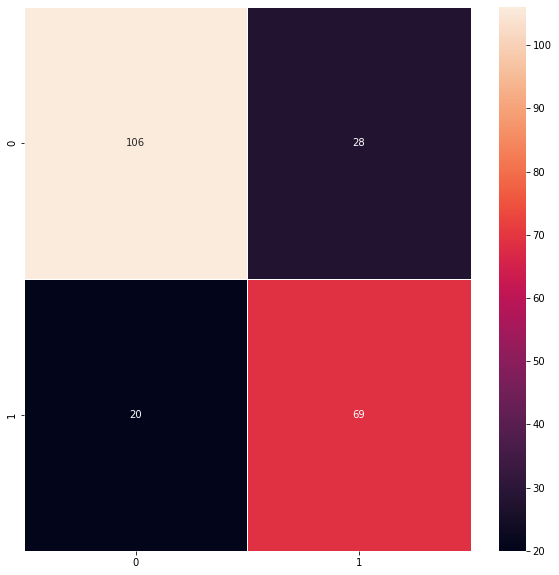

In [71]:
import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

In [72]:
#cross validation logreg
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
m = LogisticRegression(max_iter=500)
m.fit(X_train,y_train)
score = m.score(X_train, y_train)
f"Training score: {score:5.3f}"
 

'Training score: 0.796'

In [73]:
scores = cross_val_score(m, X_train, y_train, cv=5)
scores.round(3)

array([0.791, 0.851, 0.746, 0.752, 0.827])

In [74]:
f"Mean cross-validation score: {scores.mean(): 5.3f}"

'Mean cross-validation score:  0.793'

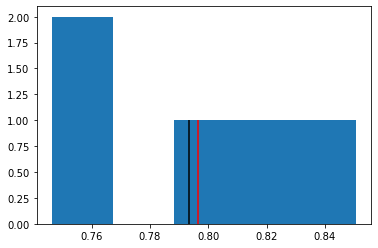

In [75]:
plt.hist(scores, bins=5) #it doesn't add much value for low ks
plt.vlines(scores.mean(),ymin=0,ymax=1, color='black')
plt.vlines(score,ymin=0,ymax=1, color='red') # this is the model score

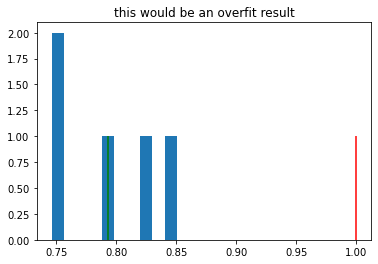

In [76]:
plt.hist(scores, bins=10) #it doesn't add much value for low ks
plt.vlines(scores.mean(),ymin=0,ymax=1, color='green')
plt.title('this would be an overfit result')
plt.vlines(1,ymin=0,ymax=1, color='red')

In [77]:
#Decision Tree method
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#logistic regression
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import os

In [78]:
X=train[['Sex_c', 'Pclass', 'age_sex']]
y=train['Survived']
X.shape, y.shape

((891, 3), (891,))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
#Normalising the train and test
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

In [80]:
clf_Decision_Tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
#sns.scatterplot (
    #data=X_train,
    #x=X_train["Sex_c"],
   # y=X_train["Pclass"],
   # hue=y_train["Survived"],
   # )

In [81]:
DT_predictions = clf_Decision_Tree.predict(X_train)
round(accuracy_score(y_train, DT_predictions), 3)

0.813

In [82]:
DT_predictions = clf_Decision_Tree.predict (X_test)
round(accuracy_score(y_test, DT_predictions), 3)

0.798

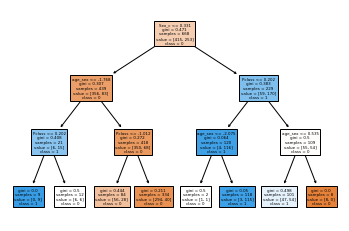

In [83]:
t = plot_tree(clf_Decision_Tree, feature_names=["Sex_c", "Pclass", "age_sex"],  class_names=["0", "1"], filled=True)

Precision = 0.7750 
Recall = 0.6966
              precision    recall  f1-score   support

    Survived       0.81      0.87      0.84       134
        Dead       0.78      0.70      0.73        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



<AxesSubplot:>

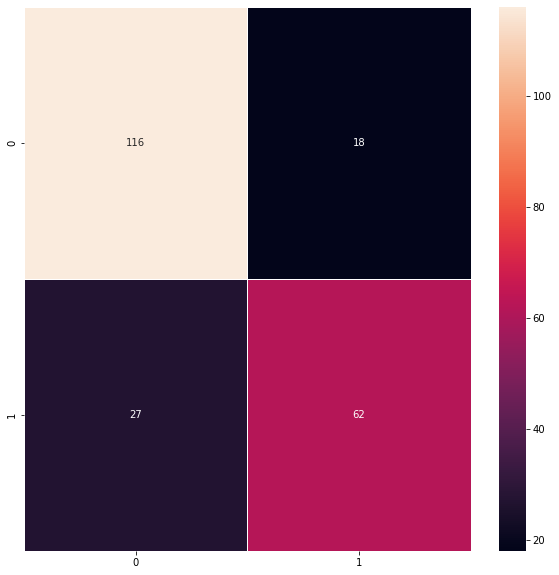

In [84]:
# Test accuracy
accuracy_score(y_test,DT_predictions) 
# Precision and Recall
from sklearn.metrics import precision_score
precision = precision_score(y_test,DT_predictions)
recall = recall_score(y_test,DT_predictions)
print(f'Precision = {precision:.4f} \nRecall = {recall:.4f}')
print(classification_report(y_test, DT_predictions, target_names=['Survived', 'Dead']))
cf_matrix = confusion_matrix(y_test, DT_predictions)
import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

In [85]:
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [86]:
#Random Forest
clf_RF=RandomForestClassifier(n_estimators=100, max_depth=2, max_samples=50)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_samples=50)

In [87]:
round(clf_RF.score(X_train, y_train), 3)

0.804

In [88]:
round(clf_RF.score(X_test, y_test), 3)

0.807

In [89]:
#TABLE of RESULTS
df = pd.DataFrame({'LogitRegbalanced': [0.778, 0.785],
       'LogitReg': [0.796, 0.798],
       'Decision Tree': [0.813, 0.798],
       'RFC': [0.789, 0.78],
       },
       index=['Train Score','Test Score'])

df

,LogitRegbalanced,LogitReg,Decision Tree,RFC
Train Score,0.778,0.796,0.813,0.789
Test Score,0.785,0.798,0.798,0.780


In [90]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Models", "Train Score", "Test Score" ]) 
  
# Add rows 
myTable.add_row(["LogitRegbalanced", "LogitReg", "Decision Tree", "RFC"]) 
myTable.add_row(["0.7", "0.778", "0.785"]) 
myTable.add_row(["0.8", "0.796", "0.798"]) 
myTable.add_row(["0.9", "0.813", "0.798"]) 
myTable.add_row(["0.87" "0.789", "0.78", ]) 

  
print(myTable)

ValueError: Row has incorrect number of values, (actual) 4!=3 (expected)

In [91]:
myTable

Models,Train Score,Test Score


In [92]:
import warnings
warnings.filterwarnings("ignore")